In [75]:
class Point():
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [76]:
class Node():
    def __init__(self, x0, y0, w, h, points):
        self.x0 = x0
        self.y0 = y0
        self.width = w
        self.height = h
        self.points = points
        self.children = []

    def get_width(self):
        return self.width

    def get_height(self):
        return self.height

    def get_points(self):
        return self.points

In [77]:
def recursive_subdivide(node, k):
    if len(node.points)<=k:
        return

    w_ = float(node.width/2)
    h_ = float(node.height/2)

    p = contains(node.x0, node.y0, w_, h_, node.points)
    x1 = Node(node.x0, node.y0, w_, h_, p)
    recursive_subdivide(x1, k)

    p = contains(node.x0, node.y0+h_, w_, h_, node.points)
    x2 = Node(node.x0, node.y0+h_, w_, h_, p)
    recursive_subdivide(x2, k)

    p = contains(node.x0+w_, node.y0, w_, h_, node.points)
    x3 = Node(node.x0 + w_, node.y0, w_, h_, p)
    recursive_subdivide(x3, k)

    p = contains(node.x0+w_, node.y0+h_, w_, h_, node.points)
    x4 = Node(node.x0+w_, node.y0+h_, w_, h_, p)
    recursive_subdivide(x4, k)

    node.children = [x1, x2, x3, x4]


def contains(x, y, w, h, points):
    pts = []
    for point in points:
        if point.x >= x and point.x <= x+w and point.y>=y and point.y<=y+h:
            pts.append(point)
    return pts


def find_children(node):
    if not node.children:
        return [node]
    else:
        children = []
        for child in node.children:
            children += (find_children(child))
    return children

In [78]:
import random
import matplotlib.pyplot as plt # plotting libraries
import matplotlib.patches as patches

In [79]:
class QTree():
    def __init__(self, k, n):
        self.threshold = k
        self.points = [Point(random.uniform(0, 10), random.uniform(0, 10)) for x in range(n)]
        self.root = Node(0, 0, 10, 10, self.points)

    def add_point(self, x, y):
        self.points.append(Point(x, y))

    def get_points(self):
        return self.points

    def subdivide(self):
        recursive_subdivide(self.root, self.threshold)

    def graph(self):
        fig = plt.figure(figsize=(12, 8))
        plt.title("Quadtree")
        c = find_children(self.root)
        print("Number of segments: %d" %len(c))
        areas = set()
        for el in c:
            areas.add(el.width*el.height)
        print("Minimum segment area: %.3f units" %min(areas))
        for n in c:
            plt.gcf().gca().add_patch(patches.Rectangle((n.x0, n.y0), n.width, n.height, fill=False))
        x = [point.x for point in self.points]
        y = [point.y for point in self.points]
        plt.plot(x, y, 'ro') # plots the points as red dots
        plt.show()
        return

Number of segments: 19
Minimum segment area: 1.562 units


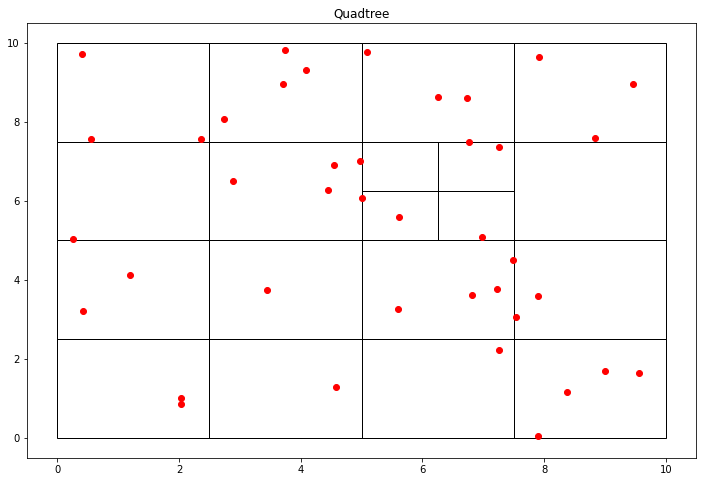

Number of segments: 1
Minimum segment area: 100.000 units


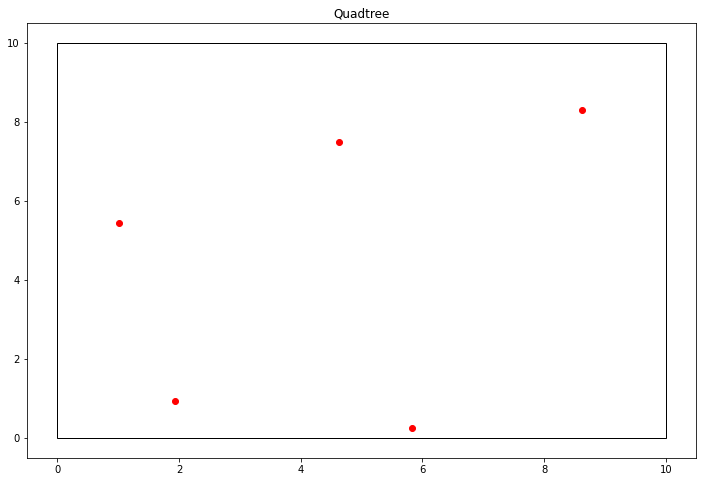

In [80]:
qtTemp = QTree(4, 40)  #contrast threshold, min cell size, img
qtTemp.subdivide() # recursively generates quad tree
qtTemp.graph()

qtTemp2 = QTree(9, 5)
qtTemp2.subdivide()
qtTemp2.graph()